In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
dataframe=pd.read_csv("Carseats.csv")
X=dataframe[["Price","Urban","US"]]
y=dataframe["Sales"]

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
model=LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

13.585682795540261
[-0.05918875 -0.22900421  1.223417  ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        13:55:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

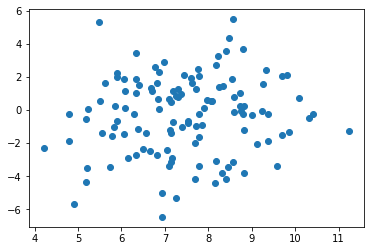

In [6]:
import statsmodels.formula.api as smf

model2 = smf.ols("Sales ~ Price +Urban+ US ",data=dataframe).fit()

y_pred=model2.predict(X_test)
plt.scatter(y_pred,(y_pred-y_test))
model2.summary()

for price and us we can reject null hypothesis


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        13:57:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

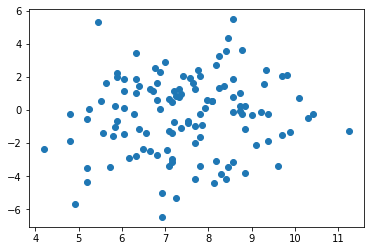

In [8]:
import statsmodels.formula.api as smf

model3 = smf.ols("Sales ~ Price + US ",data=dataframe).fit()

y_pred2=model3.predict(X_test)
plt.scatter(y_pred2,(y_pred2-y_test))
model3.summary()

In [9]:
confinter = model3.conf_int(alpha=0.05)
confinter.rename(columns={0: "min.", 1: "max.",})

,min.,max.
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


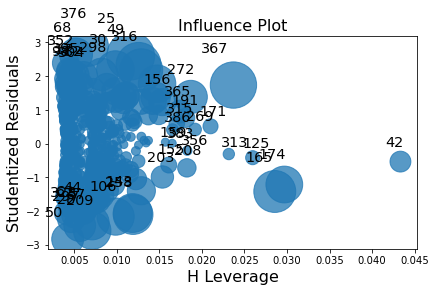

In [22]:
fig = sm.graphics.influence_plot(model3)
fig.tight_layout(pad=0.5)

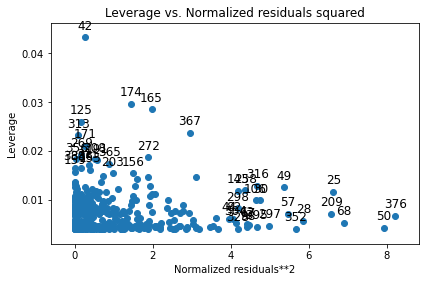

In [18]:
fig = sm.graphics.plot_leverage_resid2(model3)
fig.tight_layout(pad=1.0)


from above graphs we can deduce the presence of outliners and leverage points
